# プロキシ
## httpとは
一般的なインターネット通信で使われる仕組み  
requestを送るとresponseが返って来る  
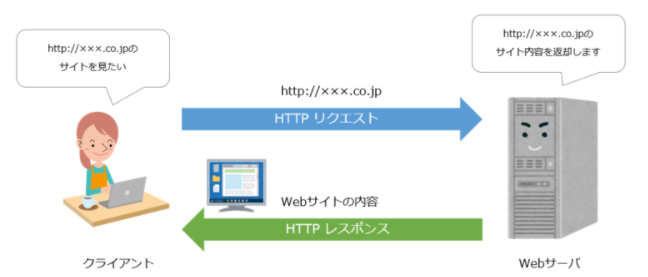

## プロキシ（サーバー）とは
[参考](https://digital-shift.jp/flash_news/s_210208_2)  
社外と安全にhttp通信をするための仕組み（サーバー）  
社内から直接社外へhttp通信する事は、セキュリティ上危険であり基本的に禁止されている（京セラも同様）  
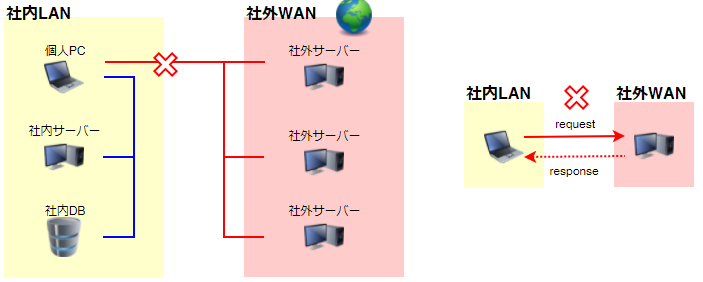  
社外へのhttp通信をプロキシサーバーを経由して行うのが一般的  
直接接続できない分、各アプリケーションでの設定が複雑になるが、セキュリティが担保される  
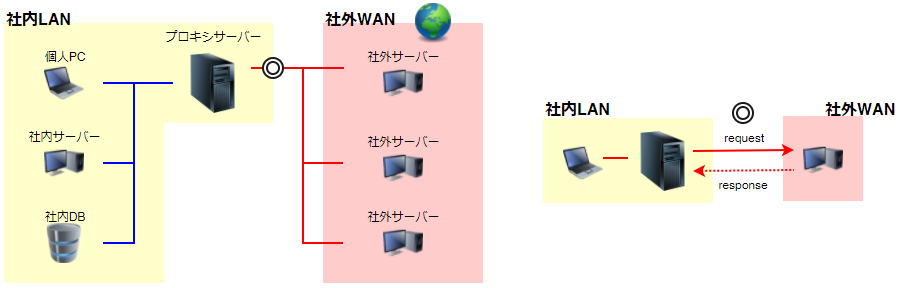


## 各アプリケーションでの設定
http通信を行うアプリケーションは多くある  
各アプリケーションは、社内ネットワーク通信はプロキシを通さず、社外ネットワーク通信はプロキシを通す事で適切な通信ができる  
各アプリケーションによってプロキシの設定方法が異なる  
- chromeの場合（親切設計）  
  社内ネットワークと社外ネットワークをchrome内で自動判別する  
  社外ネットワークの場合はPCで設定したプロキシ設定を利用して接続する
- pythonの場合（少し不親切設計）  
  社内ネットワークと社外ネットワークはアプリケーション上で区別できない  
  社内と社外の判別、及び社外の場合に利用するプロキシの設定はPCの環境変数の設定値を利用して接続する  …下に記載  
  コード上で指定できる場合もある  …下に記載  
- その他多くのアプリケーション（不親切設計）  
  プロキシを利用できない  
  社外へ接続する場合は、社外Wifi環境下で使用するか、特別なプロキシ回避ソフトを入れて通す  

## pythonのプロキシ設定
pythonのプロキシの設定は、PCの環境変数の設定値に従う  
「win」ボタン → 「環境変数」で検索 → 「ユーザー環境変数」設定  
自身で追加必要  
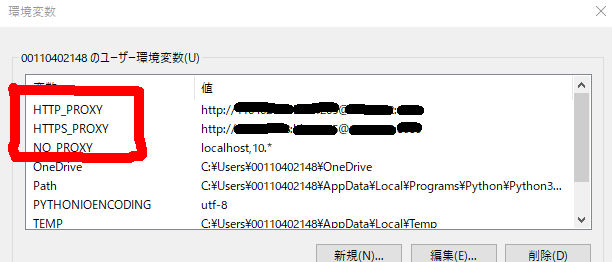  

- HTTP_PROXY：プロキシの設定
- HTTPS_PROXY：プロキシの設定  

  プロキシの設定の書き方（2つとも同じ）  
  http://ID:PW@10.1.8.72:8080  
  ID、PWはポータルの設定  

- NO_PROXY：プロキシを通さないIPの設定  

  上の2つのproxyを設定すると、全てのhttpリクエストがプロキシを通ってしまうため、   
  プロキシを通したくないもの（社内ネットワーク）は「NO_PROXY」に入れて回避する  
  localhostへのhttp通信はpythonが裏で使う事もあるため、必須で入れた方が良い  
  その他、社内接続のIP（10.\*）を追加しても良い 

## ソフト上で指定できるもの
selenium（ウェブスクレイピングライブラリ）  
optionで--no_proxyを記載すると全てプロキシを通さず社内ネットワークで接続する